# REDES NEURONALES

---



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de dígitos del 0 al 9 escritos a mano. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es MNIST, una base de datos constituida por (como no) imágenes de dígitos escritos a mano. Este dataset es ampliamente utilizado en docencia como punto de entrada al entrenamiento de redes neuronales y otros, pero también es muy utilizado en trabajos reales de investigación para el entrenamiento de imágenes. Puedes consultar más información sobre el dataset en [este enlace](https://es.wikipedia.org/wiki/Base_de_datos_MNIST).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados y que son perfectamente visibles en la versión PDF que debes entregar adjunta**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [1]:
from keras.datasets.mnist import load_data
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

Tenemos la suerte de que el dataset MNIST, el que vamos a utilizar en esta actividad, está guardado en Keras, por lo que podemos utilizarlo sin necesidad de buscar el dataset de forma externa.

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen los dígitos y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [3]:
(training_images, training_labels), (test_images, test_labels) = load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0 

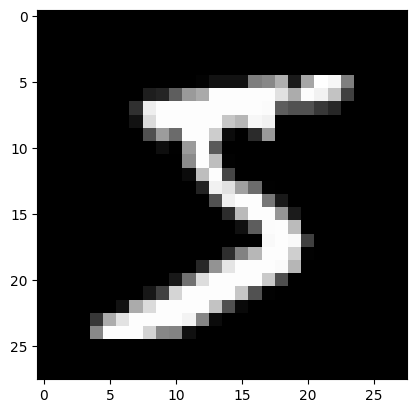

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [5]:
num_training_images = training_images.shape[0]
num_test_images = test_images.shape[0]

image_shape = training_images.shape[1:]

print(f"Cantidad de imágenes de training: {num_training_images}")
print(f"Cantidad de imágenes de test: {num_test_images}")
print(f"Tamaño de las imágenes: {image_shape}")

Cantidad de imágenes de training: 60000
Cantidad de imágenes de test: 10000
Tamaño de las imágenes: (28, 28)


- La cantidad de imágenes en el conjunto de training es de 60,000.
- La cantidad de imágenes en el conjunto de test es de 10,000.
- Cada imagen tiene un tamaño de 28x28 píxeles.*Tu respuesta aquí*

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

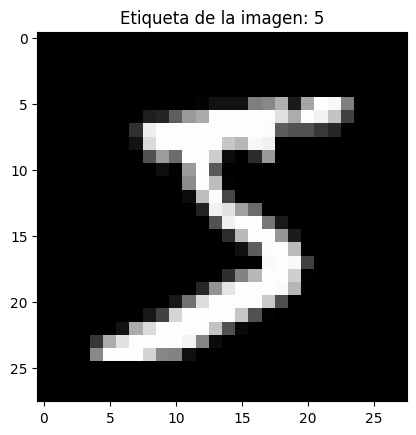

Valores de los píxeles de la imagen:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 2

In [6]:
example_image = training_images[0]
example_label = training_labels[0]

plt.imshow(example_image, cmap="gray")
plt.title(f"Etiqueta de la imagen: {example_label}")
plt.show()

print("Valores de los píxeles de la imagen:")
print(example_image)
print("\nEtiqueta asociada a la imagen:")
print(example_label)

Cada imagen en el dataset MNIST está representada por una matriz de 28x28 píxeles, donde los valores indican la intensidad de los píxeles en escala de grises (de 0 a 255). En este caso, la imagen visualizada muestra un número 5, y los valores de la matriz reflejan las áreas blancas que forman el dígito.

La variable y (etiqueta) contiene el valor numérico que representa el dígito en la imagen. Para esta imagen, la etiqueta asociada es 5. Así, las imágenes contienen los datos visuales y las etiquetas proporcionan la clase correspondiente que el modelo utilizará para entrenarse.

## 2. Normalización y preprocesado de los datos

**Pregunta 2.1 (0.25 puntos)** Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. ¿Cómo lo podemos hacer?

In [7]:
training_images = training_images / 255
test_images = test_images / 255

print(training_images[0])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.    

**Pregunta 2.2 (0.25 puntos)** Utiliza la función ***reshape*** de Numpy para convertir las imágenes en vectores de características de un tamaño de (N, 784). Explica con tus palabras por qué es necesario hacer esto.



In [8]:
training_images = training_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)

print(f"Nueva forma de training_images: {training_images.shape}")
print(f"Nueva forma de test_images: {test_images.shape}")

Nueva forma de training_images: (60000, 784)
Nueva forma de test_images: (10000, 784)


Es necesario usar reshape para convertir las imágenes de 28x28 en vectores de 784 elementos porque las redes neuronales no entienden bien las imágenes en formato de matriz. Ellas prefieren trabajar con listas largas (vectores), donde cada número representa un píxel de la imagen. Al aplanarlas, logramos que la red pueda procesar mejor la información y aprender más fácilmente. Básicamente, le damos a la red los datos de una manera que puede entender mejor.

**Pregunta 2.3 (0.25 puntos)** Para facilitar el desarrollo de la actividad, vamos a expresar las etiquetas así:

In [9]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

Muestra cómo son ahora los datos, como resultado de este cambio y también de los realizados en las dos preguntas anteriores. Debate cómo se beneficiará la red neuronal de todos estos cambios.

In [10]:
print(f"Ejemplo de etiquetas de entrenamiento después de la conversión a categóricas:\n{training_labels[:5]}")
print(f"\nEjemplo de etiquetas de prueba después de la conversión a categóricas:\n{test_labels[:5]}")
print(f"\nForma de los datos de entrenamiento después de la normalización y reshape:\n{training_images.shape}")
print(f"\nForma de las etiquetas de entrenamiento después de la conversión a categóricas:\n{training_labels.shape}")

Ejemplo de etiquetas de entrenamiento después de la conversión a categóricas:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Ejemplo de etiquetas de prueba después de la conversión a categóricas:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

Forma de los datos de entrenamiento después de la normalización y reshape:
(60000, 784)

Forma de las etiquetas de entrenamiento después de la conversión a categóricas:
(60000, 10)


In [11]:
training_images.shape[1]

784

Al normalizar los datos, evitamos que grandes diferencias en los valores de los píxeles afecten el aprendizaje, lo que hace que la red sea más eficiente y estable. Al convertir las imágenes en vectores, la red puede procesarlas de manera lineal, como lo espera, y con la transformación de las etiquetas a formato categórico, facilitamos que la red use funciones de activación como softmax para predecir la clase correcta. Todos estos cambios mejoran la precisión y aceleran el proceso de aprendizaje de la red neuronal, optimizando su rendimiento en la tarea de clasificar los dígitos.

## 3. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 3.1 (0.5 puntos)**. Utilizando Keras, y preparando los datos de X e Y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de MNIST con las siguientes características:

* Una capa de entrada del tamaño adecuado.
* Una capa oculta de 512 neuronas.
* Una capa final con 10 salidas.

In [12]:
import tensorflow as tf

# Definir el modelo secuencial con una capa oculta de 512 neuronas y activación 'relu'
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(training_images.shape[1],)),
    tf.keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas, una por cada clase
])

# Optimizador 'adam' y categorical_crossentropy como pérdida
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con los datos de entrenamiento
model.fit(training_images, training_labels, epochs=20)

# Evaluar el modelo con los datos de prueba y mostrar la precisión
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nPrecisión en los datos de prueba: {test_acc}')

c:\Users\contr\.conda\envs\env_deep\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8999 - loss: 0.3381
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9754 - loss: 0.0826
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9843 - loss: 0.0505
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9893 - loss: 0.0343
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9928 - loss: 0.0235
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9937 - loss: 0.0198
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9955 - loss: 0.0140
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9961 - loss: 0.0129
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9957 - loss: 0.0115
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9975 - loss: 0.0090
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9969 - loss: 0.0090
Epoch 12/20
1875/1875 ━━━━━━

**Pregunta 3.2 (0.25 puntos)**: ¿crees conveniente utilizar una capa flatten en este caso? Motiva tu respuesta.



In [13]:
### Tu código para incluir una capa flatten si lo ves necesario ###

Dado que ya he usado la función reshape para aplanar las imágenes de formato (28, 28) a un vector de 784 características en la pregunta 2.2, no es necesario utilizar la capa Flatten en este caso. La operación de reshape ya cumple con la misma función que Flatten haría dentro del modelo.

Flatten tiene sentido cuando las imágenes están en formato bidimensional, pero dado que ya están convertidas en vectores de 784 elementos, el uso de Flatten sería redundante.

**Pregunta 3.3 (0.25 puntos)**: Utiliza la función summary() para mostrar la estructura de tu modelo.

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,221,152 (4.66 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 814,102 (3.11 MB)

## 4: Compilación y entrenamiento

**Pregunta 4.1 (0.5 puntos)**: Compila tu modelo. Utiliza ***categorical_crossentropy*** como función de pérdida, ***Adam*** como optimizador, y monitoriza la ***tasa de acierto*** durante el entrenamiento. Explica qué hace cada cosa en la compilación.

In [15]:
# Cabe mencionar que ya compilé el modelo previamente con estos requerimientos, 
# pero como te lo piden nuevamente, lo defnifiré para explicar los parámetros.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

- **categorical_crossentropy (función de pérdida):** Es ideal para clasificación multiclase, como en MNIST. Mide la diferencia entre las predicciones del modelo y las etiquetas verdaderas. El objetivo es minimizar esta pérdida ajustando los pesos del modelo.

- **Adam (optimizador):** Es un optimizador eficiente que ajusta los pesos del modelo usando los gradientes. Combina lo mejor de AdaGrad y RMSProp, lo que lo hace rápido y eficaz para muchos problemas.

- **accuracy (métrica):** Monitorea el porcentaje de aciertos del modelo durante el entrenamiento, lo que ayuda a saber qué tan bien está prediciendo las clases correctas.

**Pregunta 4.2 (0.5 puntos)**: Utiliza la función ***fit()*** para entrenar tu modelo. Para ayudarte en tu primer entrenamiento, utiliza estos valores:
*   epochs = 5
*   batch_size = 32
*   validation_split = 0.25



In [16]:
# Este sería el segundo entrenamiento del modelo, pero como ya se pidió entrenarlo en la pregunta 3.1
model.fit(training_images, training_labels, 
          epochs=5, 
          batch_size=32, 
          validation_split=0.25)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nPrecisión en los datos de prueba: {test_acc}')

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9986 - loss: 0.0042 - val_accuracy: 0.9981 - val_loss: 0.0049
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9990 - loss: 0.0040 - val_accuracy: 0.9965 - val_loss: 0.0111
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9984 - loss: 0.0063 - val_accuracy: 0.9947 - val_loss: 0.0188
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9983 - loss: 0.0042 - val_accuracy: 0.9969 - val_loss: 0.0118
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9982 - loss: 0.0053 - val_accuracy: 0.9954 - val_loss: 0.0154
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9774 - loss: 0.1669

Precisión en los datos de prueba: 0.9805999994277954


# 5: Impacto al variar el número de neuronas en las capas ocultas

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por otros valores. Para ello, utiliza la red neuronal de la pregunta 3, y su capa oculta cambia el número de neuronas:

* **216 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

y entrena la red en ambos casos.

In [17]:
# Definir el modelo con 216 neuronas en la capa oculta
model_216 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(216, activation='relu', input_shape=(training_images.shape[1],)), 
    tf.keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas
])

model_216.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

model_216.fit(training_images, training_labels, 
              epochs=5, 
              batch_size=32, 
              validation_split=0.25)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nPrecisión en los datos de prueba: {test_acc}')

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8754 - loss: 0.4317 - val_accuracy: 0.9581 - val_loss: 0.1436
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9679 - loss: 0.1120 - val_accuracy: 0.9667 - val_loss: 0.1141
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9785 - loss: 0.0703 - val_accuracy: 0.9706 - val_loss: 0.0966
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9856 - loss: 0.0505 - val_accuracy: 0.9741 - val_loss: 0.0881
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9888 - loss: 0.0360 - val_accuracy: 0.9745 - val_loss: 0.0857
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9774 - loss: 0.1672

Precisión en los datos de prueba: 0.9805999994277954


In [18]:
# Definir el modelo con 1024 neuronas en la capa oculta
model_1024 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(training_images.shape[1],)),
    tf.keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas
])

model_1024.compile(optimizer='adam', 
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])

model_1024.fit(training_images, training_labels, 
               epochs=5, 
               batch_size=32, 
               validation_split=0.25)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nPrecisión en los datos de prueba: {test_acc}')

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8963 - loss: 0.3436 - val_accuracy: 0.9602 - val_loss: 0.1323
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9748 - loss: 0.0849 - val_accuracy: 0.9683 - val_loss: 0.1038
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9854 - loss: 0.0477 - val_accuracy: 0.9742 - val_loss: 0.0857
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9895 - loss: 0.0357 - val_accuracy: 0.9739 - val_loss: 0.0876
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9941 - loss: 0.0207 - val_accuracy: 0.9716 - val_loss: 0.1050
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9774 - loss: 0.1669

Precisión en los datos de prueba: 0.9805999994277954


**Pregunta 5.1 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?


El impacto de variar el número de neuronas en la capa oculta es que, con 216, el entrenamiento es más rápido, mientras que con 1024 tarda mucho más, aunque la precisión final es casi la misma en ambos casos. Más neuronas no siempre significan mejor rendimiento. Quizá, si los datos fueran más complejos o si el modelo tuviera más capas, añadir más neuronas tendría un impacto positivo en la precisión. Pero en este caso, parece que un número más alto solo hace que el entrenamiento sea más lento sin una mejora significativa en el resultado.

# 6: Número de neuronas de la capa de salida
Considerad la capa final, la de salida de la red neuronal de la pregunta 3.

**Pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**Pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10?

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(training_images.shape[1],)),
    tf.keras.layers.Dense(5, activation='softmax')  # Capa de salida con 5 neuronas
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, 
          epochs=5, 
          batch_size=32, 
          validation_split=0.25)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nPrecisión en los datos de prueba: {test_acc}')

Epoch 1/5


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 10), output.shape=(None, 5)

Tu respuestas a la pregunta 6.1 aquí:
La capa de salida tiene 10 neuronas porque estamos clasificando 10 dígitos (0 al 9), por lo que cada neurona representa una clase.

Tu respuestas a la pregunta 6.2 aquí:
Si cambiamos el número de neuronas a un valor diferente, como 5, el modelo no podrá clasificar correctamente los 10 dígitos. En este caso, el error se debe a que las etiquetas originales contienen 10 clases y el modelo, al tener solo 5 neuronas de salida, no es capaz de interpretar todas las categorías, lo cual es necesario para esta tarea de clasificación.

# 7: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 3:

**Pregunta 7.1 (0.25 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**Pregunta 7.2 (0.25 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento.

**Pregunta 7.3 (0.25 puntos)**
* ¿Qué está pasando en la pregunta anterior? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [23]:
model_15_epochs = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(training_images.shape[1],)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_15_epochs.compile(optimizer='adam', 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

model_15_epochs.fit(training_images, training_labels, 
                    epochs=15, # Entrenar el modelo con 15 epochs
                    batch_size=32, 
                    validation_split=0.25)

test_loss, test_acc = model_15_epochs.evaluate(test_images, test_labels)
print(f'\nPrecisión en los datos de prueba con 15 epochs: {test_acc}')

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8916 - loss: 0.3691 - val_accuracy: 0.9614 - val_loss: 0.1265
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9709 - loss: 0.0964 - val_accuracy: 0.9683 - val_loss: 0.1031
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9837 - loss: 0.0545 - val_accuracy: 0.9688 - val_loss: 0.1019
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9878 - loss: 0.0392 - val_accuracy: 0.9763 - val_loss: 0.0817
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9919 - loss: 0.0262 - val_accuracy: 0.9723 - val_loss: 0.1011
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9935 - loss: 0.0207 - val_accuracy: 0.9750 - val_loss: 0.0908
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9957 - loss: 0.0143 - val_accuracy: 0.9758 - val_loss: 0.0886
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9960 - loss: 0.0121 - 

In [24]:
model_30_epochs = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(training_images.shape[1],)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_30_epochs.compile(optimizer='adam', 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

model_30_epochs.fit(training_images, training_labels, 
                    epochs=30, # Entrenar el modelo con 30 epochs
                    batch_size=32, 
                    validation_split=0.25)

test_loss, test_acc = model_30_epochs.evaluate(test_images, test_labels)
print(f'\nPrecisión en los datos de prueba con 30 epochs: {test_acc}')

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8862 - loss: 0.3846 - val_accuracy: 0.9617 - val_loss: 0.1314
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9719 - loss: 0.0944 - val_accuracy: 0.9667 - val_loss: 0.1037
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9830 - loss: 0.0574 - val_accuracy: 0.9751 - val_loss: 0.0843
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9871 - loss: 0.0426 - val_accuracy: 0.9740 - val_loss: 0.0873
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9926 - loss: 0.0255 - val_accuracy: 0.9759 - val_loss: 0.0879
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9948 - loss: 0.0185 - val_accuracy: 0.9771 - val_loss: 0.0913
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9951 - loss: 0.0157 - val_accuracy: 0.9748 - val_loss: 0.0951
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9968 - loss: 0.0103 - 

Tu respuesta a la pregunta 7.3 aquí:
Al aumentar las épocas a 30, la precisión en los datos de prueba no mejora significativamente y la pérdida comienza a aumentar en el conjunto de validación. Este fenómeno se conoce como overfitting o sobreajuste, es decir, el modelo se ajusta demasiado a los datos de entrenamiento, capturando detalles y ruido específicos de esos datos. Como resultado, pierde su capacidad para generalizar bien con datos nuevos, causando un descenso en el rendimiento en el conjunto de validación y prueba.

# 8: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [25]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Pregunta 8.1. *(0.75 puntos)***: Consulta la documentación de Keras y aprende cómo podemos utilizar Early stop en nuestro modelos.

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(training_images.shape[1],)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configuración del Early Stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',       # Monitorea la pérdida de validación
    patience=3,               # Número de épocas sin mejora tras el cual se detiene el entrenamiento
    verbose=1,                # Mostrar mensajes sobre el estado del Early Stopping
    restore_best_weights=True # Restaurar los pesos con el mejor resultado de validación
)

model.fit(training_images, training_labels, 
          epochs=30, 
          batch_size=32, 
          validation_split=0.25,
          callbacks=[early_stop])  # Incluye el callback para early stopping

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nPrecisión en los datos de prueba con 30 epochs: {test_acc}')

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8890 - loss: 0.3849 - val_accuracy: 0.9611 - val_loss: 0.1291
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9706 - loss: 0.0939 - val_accuracy: 0.9647 - val_loss: 0.1089
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9824 - loss: 0.0581 - val_accuracy: 0.9733 - val_loss: 0.0907
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9886 - loss: 0.0378 - val_accuracy: 0.9726 - val_loss: 0.0959
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9924 - loss: 0.0243 - val_accuracy: 0.9759 - val_loss: 0.0891
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9945 - loss: 0.0180 - val_accuracy: 0.9763 - val_loss: 0.0908
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9950 - loss: 0.0152 - val_accuracy: 0.9789 - val_loss: 0.0848
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9960 - loss: 0.0125 -

## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Pregunta 9.1 *(0.75 puntos)***: Utilizando la red realizada en el ejercicio 3, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [27]:
# Red con activación Sigmoid
# Modelo con función de activación Sigmoid en capas ocultas
model_sigmoid = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='sigmoid', input_shape=(training_images.shape[1],)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_sigmoid.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

model_sigmoid.fit(training_images, training_labels, 
                  epochs=10, 
                  batch_size=32, 
                  validation_split=0.25)

test_loss, test_acc = model_sigmoid.evaluate(test_images, test_labels)
print(f'\nPrecisión en los datos de prueba: {test_acc}')

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7469 - loss: 0.8254 - val_accuracy: 0.9345 - val_loss: 0.2225
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9470 - loss: 0.1829 - val_accuracy: 0.9578 - val_loss: 0.1451
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9645 - loss: 0.1205 - val_accuracy: 0.9622 - val_loss: 0.1349
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9749 - loss: 0.0830 - val_accuracy: 0.9661 - val_loss: 0.1172
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9825 - loss: 0.0590 - val_accuracy: 0.9698 - val_loss: 0.1040
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9853 - loss: 0.0442 - val_accuracy: 0.9721 - val_loss: 0.1055
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9885 - loss: 0.0354 - val_accuracy: 0.9751 - val_loss: 0.0928
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9916 - loss: 0.0264 -

In [28]:
# Red con activación ReLU
# Modelo con función de activación ReLU en capas ocultas
model_relu = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(training_images.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

model_relu.fit(training_images, training_labels, 
               epochs=10, 
               batch_size=32, 
               validation_split=0.25)

test_loss, test_acc = model_relu.evaluate(test_images, test_labels)
print(f'\nPrecisión en los datos de prueba: {test_acc}')

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8834 - loss: 0.3830 - val_accuracy: 0.9660 - val_loss: 0.1084
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9696 - loss: 0.0999 - val_accuracy: 0.9705 - val_loss: 0.0985
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9809 - loss: 0.0593 - val_accuracy: 0.9695 - val_loss: 0.1075
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9847 - loss: 0.0492 - val_accuracy: 0.9723 - val_loss: 0.1080
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9885 - loss: 0.0361 - val_accuracy: 0.9683 - val_loss: 0.1201
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9901 - loss: 0.0311 - val_accuracy: 0.9757 - val_loss: 0.0967
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9913 - loss: 0.0268 - val_accuracy: 0.9767 - val_loss: 0.0985
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9919 - loss: 0.0265 - 

Se observa que la red con ReLU converge más rápido y obtiene mejores métricas en general. Esto se debe a que ReLU evita el problema de "vanishing gradients" que suele ocurrir con sigmoid, especialmente en redes profundas. Además, ReLU permite una dinámica de aprendizaje más efectiva, ayudando a la red a alcanzar precisiones más altas en menos tiempo. En cambio, sigmoid es más lenta y tiende a saturarse, lo que limita la eficiencia en la optimización.

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Pregunta 10.1 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [29]:
# Modelo con inicialización de parámetros en cero
model_zeros = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='zeros', input_shape=(training_images.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='zeros'),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='zeros'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_zeros.compile(optimizer='adam', 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])

model_zeros.fit(training_images, training_labels, 
                epochs=10, 
                batch_size=32, 
                validation_split=0.25)

test_loss, test_acc = model_zeros.evaluate(test_images, test_labels)
print(f'\nPrecisión en los datos de prueba: {test_acc}')

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1144 - loss: 2.3018 - val_accuracy: 0.1076 - val_loss: 2.3019
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1152 - loss: 2.3009 - val_accuracy: 0.1076 - val_loss: 2.3021
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1146 - loss: 2.3010 - val_accuracy: 0.1076 - val_loss: 2.3019
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1155 - loss: 2.3007 - val_accuracy: 0.1076 - val_loss: 2.3020
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1152 - loss: 2.3008 - val_accuracy: 0.1076 - val_loss: 2.3018
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1161 - loss: 2.3010 - val_accuracy: 0.1076 - val_loss: 2.3021
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1138 - loss: 2.3008 - val_accuracy: 0.1076 - val_loss: 2.3018
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1152 - loss: 2.3009 - 

In [30]:
# Modelo con inicialización de parámetros aleatoria normal
model_random_normal = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal', input_shape=(training_images.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='random_normal'),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='random_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_random_normal.compile(optimizer='adam', 
                            loss='categorical_crossentropy', 
                            metrics=['accuracy'])

model_random_normal.fit(training_images, training_labels, 
                        epochs=10, 
                        batch_size=32, 
                        validation_split=0.25)

test_loss, test_acc = model_random_normal.evaluate(test_images, test_labels)
print(f'\nPrecisión en los datos de prueba: {test_acc}')

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8818 - loss: 0.3857 - val_accuracy: 0.9604 - val_loss: 0.1267
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9728 - loss: 0.0891 - val_accuracy: 0.9673 - val_loss: 0.1092
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9804 - loss: 0.0601 - val_accuracy: 0.9652 - val_loss: 0.1263
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9860 - loss: 0.0461 - val_accuracy: 0.9724 - val_loss: 0.1008
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9889 - loss: 0.0348 - val_accuracy: 0.9693 - val_loss: 0.1267
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9897 - loss: 0.0337 - val_accuracy: 0.9751 - val_loss: 0.0964
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9934 - loss: 0.0215 - val_accuracy: 0.9701 - val_loss: 0.1273
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9934 - loss: 0.0228 - 

In [31]:
# Modelo con inicialización por defecto glorot_uniform
model_glorot = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(training_images.shape[1],)),  # glorot_uniform por defecto
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_glorot.compile(optimizer='adam', 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

model_glorot.fit(training_images, training_labels, 
                 epochs=10, 
                 batch_size=32, 
                 validation_split=0.25)

test_loss, test_acc = model_glorot.evaluate(test_images, test_labels)
print(f'\nPrecisión en los datos de prueba: {test_acc}')

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8848 - loss: 0.3757 - val_accuracy: 0.9643 - val_loss: 0.1193
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9708 - loss: 0.0940 - val_accuracy: 0.9658 - val_loss: 0.1147
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9793 - loss: 0.0635 - val_accuracy: 0.9712 - val_loss: 0.0993
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9870 - loss: 0.0435 - val_accuracy: 0.9728 - val_loss: 0.1028
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9880 - loss: 0.0373 - val_accuracy: 0.9734 - val_loss: 0.1033
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9910 - loss: 0.0281 - val_accuracy: 0.9745 - val_loss: 0.0945
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9735 - val_loss: 0.1190
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9918 - loss: 0.0252 - 

La comparación muestra que la inicialización con ceros es muy ineficiente. La red prácticamente no aprende, ya que los pesos iguales no permiten una representación adecuada. La inicialización aleatoria normal funciona mucho mejor y permite que el modelo alcance una buena precisión, pero puede ser inestable, ya que a veces los pesos iniciales son muy grandes o muy pequeños. 
Finalmente, la inicialización glorot_uniform, ofrece el mejor balance, permite una convergencia rápida y estable, logrando una precisión alta sin los problemas de saturación.

## 11. Optimizadores

**Problema 11.1 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [32]:
# Modelo con optimizador SGD
model_sgd = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_uniform', input_shape=(784,)),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

model_sgd.fit(training_images, training_labels, 
              epochs=10, 
              batch_size=32, 
              validation_split=0.25)

test_loss, test_acc = model_sgd.evaluate(test_images, test_labels)
print(f'\nPrecisión en los datos de prueba: {test_acc}')

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7048 - loss: 1.0953 - val_accuracy: 0.8887 - val_loss: 0.3672
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9144 - loss: 0.2929 - val_accuracy: 0.9243 - val_loss: 0.2579
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9357 - loss: 0.2271 - val_accuracy: 0.9425 - val_loss: 0.1967
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9461 - loss: 0.1866 - val_accuracy: 0.9475 - val_loss: 0.1812
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9551 - loss: 0.1560 - val_accuracy: 0.9562 - val_loss: 0.1527
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9616 - loss: 0.1333 - val_accuracy: 0.9599 - val_loss: 0.1410
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9682 - loss: 0.1103 - val_accuracy: 0.9613 - val_loss: 0.1312
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9718 - loss: 0.1000 - 

In [33]:
# Definir el modelo con inicialización glorot_uniform
model_adam = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_uniform', input_shape=(784,)),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_adam.compile(optimizer='adam', 
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])

model_adam.fit(training_images, training_labels, 
               epochs=10, 
               batch_size=32, 
               validation_split=0.25)

test_loss, test_acc = model_adam.evaluate(test_images, test_labels)
print(f'\nPrecisión en los datos de prueba: {test_acc}')

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8863 - loss: 0.3730 - val_accuracy: 0.9479 - val_loss: 0.1713
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9705 - loss: 0.0948 - val_accuracy: 0.9657 - val_loss: 0.1153
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9807 - loss: 0.0617 - val_accuracy: 0.9659 - val_loss: 0.1169
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9839 - loss: 0.0484 - val_accuracy: 0.9733 - val_loss: 0.0977
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9877 - loss: 0.0371 - val_accuracy: 0.9705 - val_loss: 0.1275
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9904 - loss: 0.0289 - val_accuracy: 0.9702 - val_loss: 0.1233
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9918 - loss: 0.0248 - val_accuracy: 0.9741 - val_loss: 0.1071
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9919 - loss: 0.0245 - 

In [34]:
# Modelo con optimizador RMSprop
model_rmsprop = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_uniform', input_shape=(784,)),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_rmsprop.compile(optimizer='rmsprop', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

model_rmsprop.fit(training_images, training_labels, 
                  epochs=10, 
                  batch_size=32, 
                  validation_split=0.25)

test_loss, test_acc = model_rmsprop.evaluate(test_images, test_labels)
print(f'\nPrecisión en los datos de prueba: {test_acc}')

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8800 - loss: 0.3826 - val_accuracy: 0.9519 - val_loss: 0.1737
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9683 - loss: 0.1075 - val_accuracy: 0.9657 - val_loss: 0.1294
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9808 - loss: 0.0695 - val_accuracy: 0.9689 - val_loss: 0.1231
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9847 - loss: 0.0549 - val_accuracy: 0.9763 - val_loss: 0.1127
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9870 - loss: 0.0447 - val_accuracy: 0.9741 - val_loss: 0.1402
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9907 - loss: 0.0370 - val_accuracy: 0.9738 - val_loss: 0.1562
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9909 - loss: 0.0335 - val_accuracy: 0.9707 - val_loss: 0.1913
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9920 - loss: 0.0318 

Los resultados muestran diferencias claras entre los optimizadores. SGD tiene una convergencia más lenta y menor precisión en comparación con Adam y RMSprop. Aunque SGD mejora gradualmente, toma más épocas para alcanzar una buena precisión, lo que indica que no es tan eficiente para redes más profundas. Adam destaca al lograr una alta precisión rápidamente y mantener la estabilidad de la pérdida durante el entrenamiento, lo que demuestra su capacidad para adaptarse mejor a redes complejas. RMSprop también ofrece un buen rendimiento, con alta precisión y estabilidad, aunque muestra un poco más de variabilidad en la pérdida de validación en comparación con Adam. En conjunto, Adam parece ser el mejor optimizador para este caso, equilibrando velocidad de convergencia y precisión sin desventajas importantes.

## 12. Regularización y red final *(1.25 puntos)*

**Problema 12.1 *(2 puntos)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation superior al 95%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [35]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2


model_final = tf.keras.models.Sequential([
    Dense(512, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.001), input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

# Compilar el modelo con Adam y early stopping
model_final.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Configuración de Early Stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, verbose=1)

# Entrenar el modelo
history_final = model_final.fit(training_images, training_labels,
                                epochs=50,             # Hasta 50 épocas para darle espacio de mejora
                                batch_size=64,         # Batch size más grande para optimizar tiempos
                                validation_split=0.25, # Usamos 25% de los datos para validación
                                callbacks=[early_stop])

test_loss, test_accuracy = model_final.evaluate(test_images, test_labels)
print(f'Precisión en los datos de prueba: {test_accuracy}')

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8216 - loss: 1.4702 - val_accuracy: 0.9534 - val_loss: 0.7556
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9371 - loss: 0.7464 - val_accuracy: 0.9581 - val_loss: 0.5337
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9478 - loss: 0.5383 - val_accuracy: 0.9621 - val_loss: 0.4214
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9458 - loss: 0.4644 - val_accuracy: 0.9598 - val_loss: 0.3810
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9484 - loss: 0.4138 - val_accuracy: 0.9595 - val_loss: 0.3692
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9534 - loss: 0.3765 - val_accuracy: 0.9650 - val_loss: 0.3346
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9507 - loss: 0.3790 - val_accuracy: 0.9648 - val_loss: 0.3247
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9495 - loss: 0.3892 - val_accur

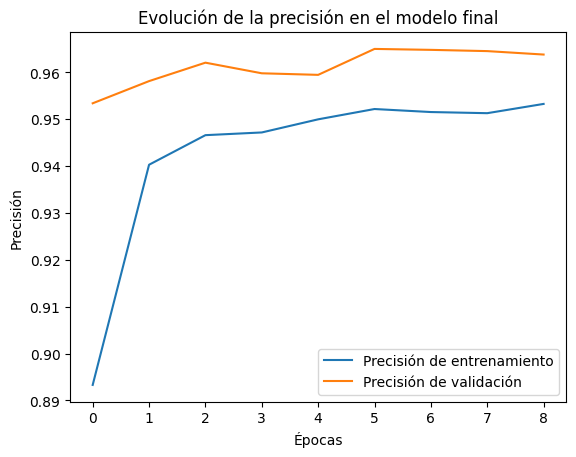

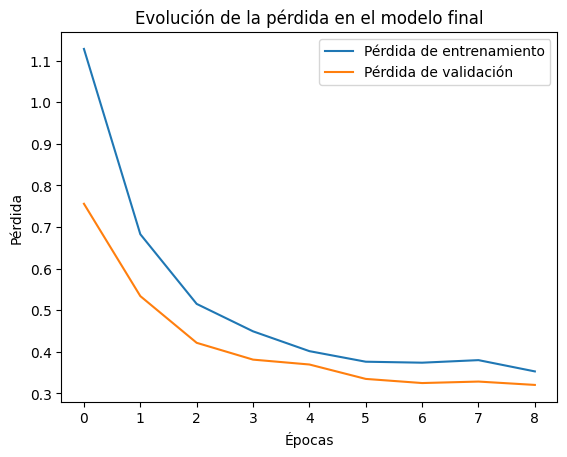

In [36]:
import matplotlib.pyplot as plt

# Gráfico la precisión
plt.plot(history_final.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_final.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Evolución de la precisión en el modelo final')
plt.show()

# Gráfico la pérdida
plt.plot(history_final.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_final.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la pérdida en el modelo final')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predicciones: [7 2 1 0 4 1 4 9 6 9]
Etiquetas reales: [7 2 1 0 4 1 4 9 5 9]


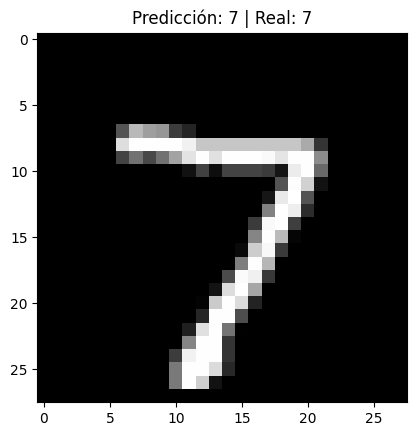

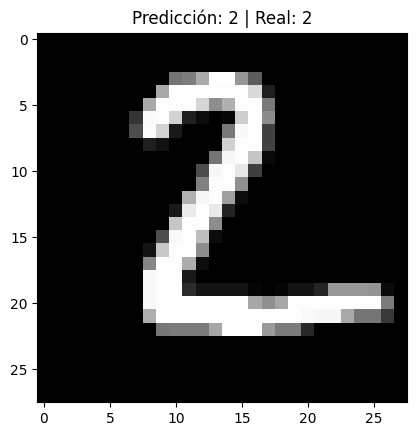

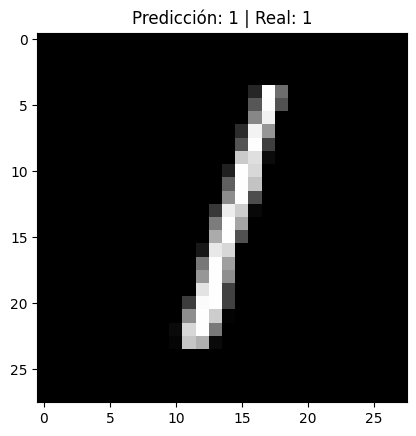

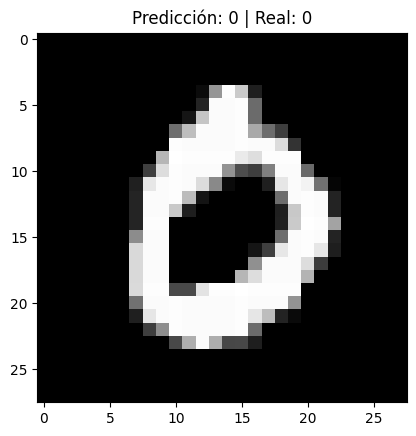

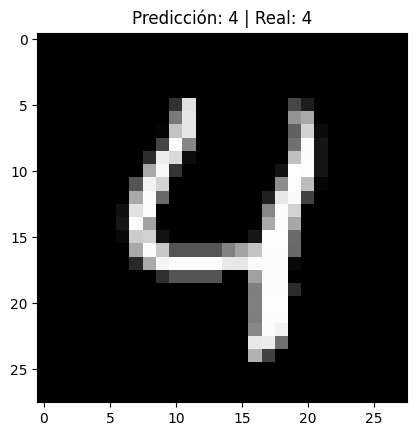

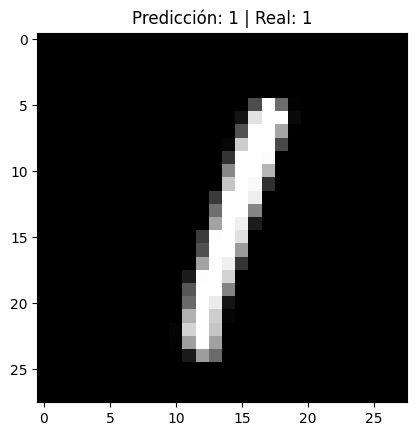

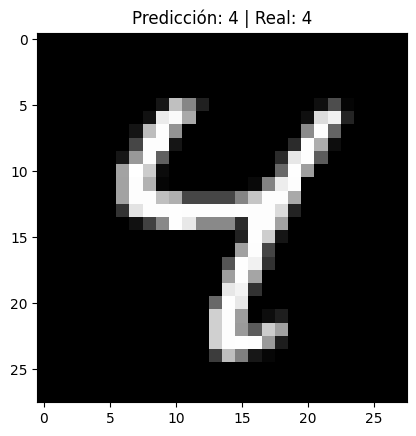

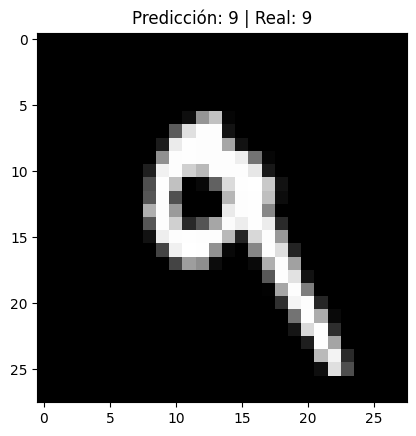

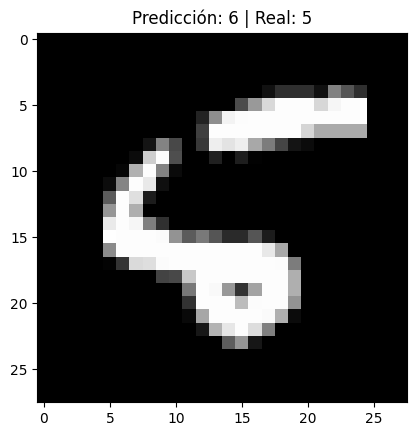

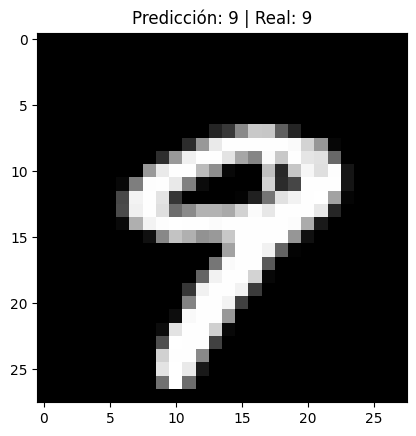

In [37]:
# Realizar predicciones en las primeras 10 imágenes del conjunto de prueba
predictions = model_final.predict(test_images[:10])

predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels[:10], axis=1)

print(f'Predicciones: {predicted_labels}')
print(f'Etiquetas reales: {true_labels}')

for i in range(10):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicción: {predicted_labels[i]} | Real: {true_labels[i]}')
    plt.show()

El modelo final logró una precisión del 96.53% en los datos de prueba, gracias a una combinación efectiva de técnicas. Se usaron capas densas con ReLU y la inicialización glorot_uniform para mejorar la estabilidad. Para evitar el sobreajuste, aplicamos dropout del 30% y regularización L2 en las capas, lo que mantuvo al modelo generalizando bien. Además, batch normalization ayudó a estabilizar el entrenamiento y acelerar la convergencia.

El uso del optimizador Adam fue clave, ya que permitió una rápida mejora en las primeras épocas, y el early stopping detuvo el entrenamiento en la época 10, cuando el rendimiento dejó de mejorar, evitando entrenar de más. En conjunto, este enfoque permitió obtener un modelo robusto, con una excelente capacidad de generalización y una alta precisión, superando el 95% en validación sin sobreentrenar.

Además, al probar el modelo con datos de prueba, se observó que las predicciones fueron bastante precisas en la mayoría de los casos. Por ejemplo, para las primeras 10 imágenes, las predicciones fueron: [7, 2, 1, 0, 4, 1, 4, 9, 6, 9], mientras que las etiquetas reales eran: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]. Solo hubo un pequeño error en la predicción del dígito 6 en lugar del 5, lo que refuerza que el modelo tiene un excelente rendimiento.

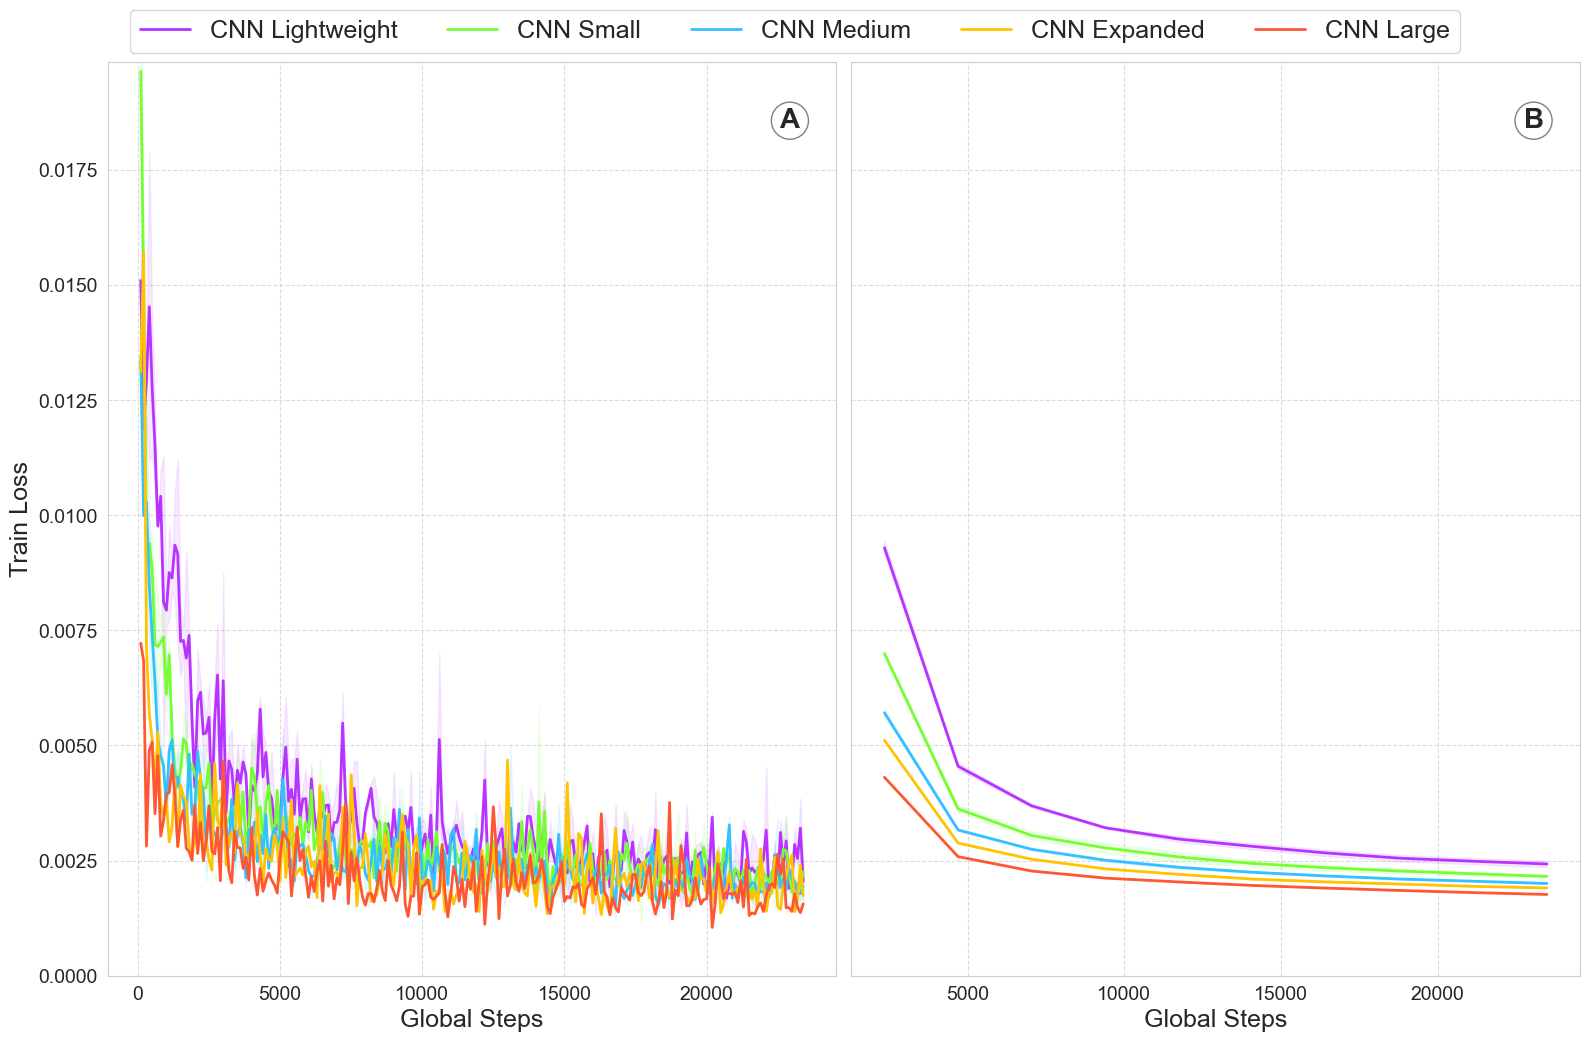

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the train loss data
train_data_steps = pd.read_csv("D:/GitHub/Tareas/Deep/muinar06_act1_individual/data/fusionx2_steps.csv")  # Data for steps
train_data_epochs = pd.read_csv("D:/GitHub/Tareas/Deep/muinar06_act1_individual/data/fusionx2_epochs.csv")  # Data for epochs

# Plot settings
sns.set_style("whitegrid")
sns.set_palette("muted")
model_names = {
    "cnn__lightweight__l1__True": "CNN Lightweight",
    "cnn__small__l1__True": "CNN Small",
    "cnn__medium__l1__True": "CNN Medium",
    "cnn__expanded__l1__True": "CNN Expanded",
    "cnn__large__l1__True": "CNN Large"
}

colors = ['#B833FF', '#75FF33', '#33C1FF', '#FFC300', '#FF5733']

# Set up the figure and subplots with more width
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))  # Increase figure size for better visibility

# Plot A: Train Loss based on Steps (left side)
for model, display_name, color in zip(model_names.keys(), model_names.values(), colors):
    ax1.plot(train_data_steps["trainer/global_step"], train_data_steps[f"{model} - train_loss_step"], color=color, linestyle='-', linewidth=2)
    ax1.fill_between(train_data_steps["trainer/global_step"], 
                     train_data_steps[f"{model} - train_loss_step__MIN"], 
                     train_data_steps[f"{model} - train_loss_step__MAX"], 
                     color=color, alpha=0.1)
    
# Customize Plot A
ax1.set_xlabel('Global Steps', fontsize=18)
ax1.set_ylabel('Train Loss', fontsize=18)
ax1.text(0.95, 0.95, 'A', transform=ax1.transAxes, ha='right', va='top', fontsize=20, fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='circle,pad=0.2'))  # Add circular white background
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='both', labelsize=14)

# Plot B: Train Loss based on Epochs (right side)
for model, display_name, color in zip(model_names.keys(), model_names.values(), colors):
    ax2.plot(train_data_epochs["trainer/global_step"], train_data_epochs[f"{model} - train_loss_epoch"], color=color, linestyle='-', linewidth=2)
    ax2.fill_between(train_data_epochs["trainer/global_step"], 
                     train_data_epochs[f"{model} - train_loss_epoch__MIN"], 
                     train_data_epochs[f"{model} - train_loss_epoch__MAX"], 
                     color=color, alpha=0.1)

# Customize Plot B
ax2.set_xlabel('Global Steps', fontsize=18)
ax2.text(0.95, 0.95, 'B', transform=ax2.transAxes, ha='right', va='top', fontsize=20, fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='circle,pad=0.2'))  # Add circular white background
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='both', labelsize=14)
ax2.set_yticklabels([])  # Remove y-axis labels on the second plot
ax2.set_ylabel('')       # Remove y-axis title on the second plot

# Set the same y-axis limits for both plots
y_max = max(train_data_steps[[f"{model} - train_loss_step" for model in model_names.keys()]].max().max(),
            train_data_epochs[[f"{model} - train_loss_epoch" for model in model_names.keys()]].max().max()) * 1.01
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

# Single, centered legend with unique labels and symbols
legend_lines = [plt.Line2D([0], [0], color=color, lw=2) for color in colors]
legend_labels = list(model_names.values())
fig.legend(legend_lines, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), fontsize=18, ncol=5, frameon=True)

# Adjust spacing between subplots and overall layout
plt.subplots_adjust(top=0.85)  # Increase the space for the legend
plt.tight_layout()

# Save the figure as a high-resolution PNG
plt.savefig('images/loss_train_fusionx2_corrected.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


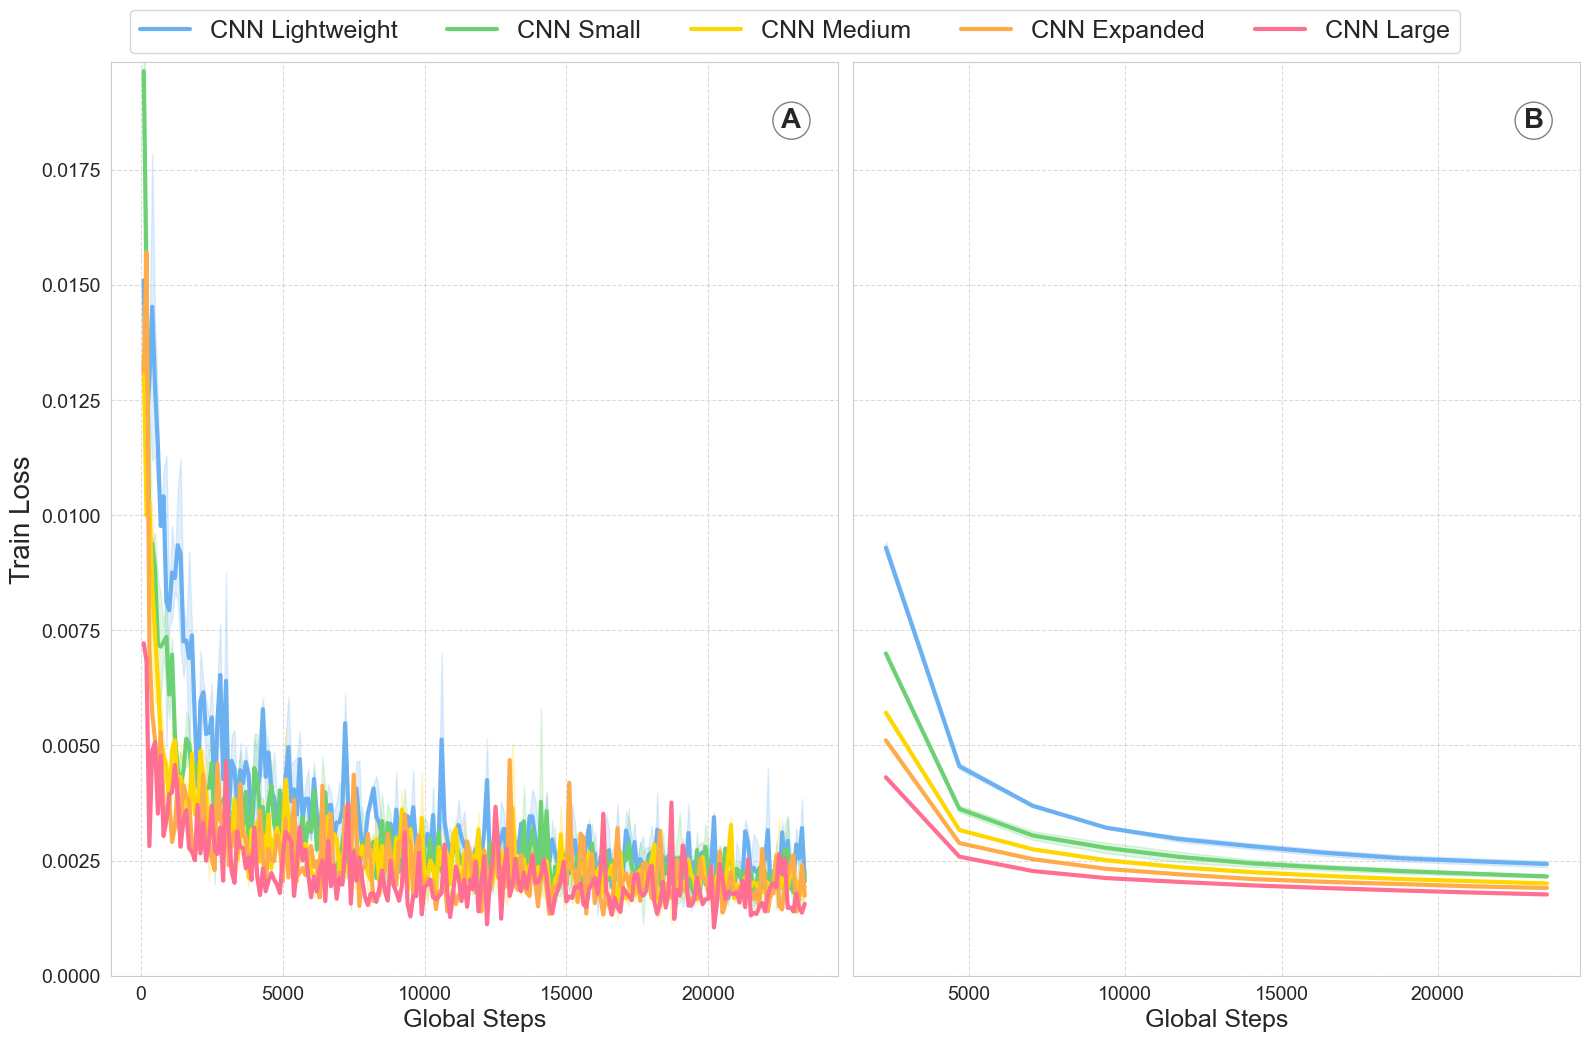

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the train loss data
train_data_steps = pd.read_csv("D:/GitHub/Tareas/Deep/muinar06_act1_individual/data/fusionx2_steps.csv")  # Data for steps
train_data_epochs = pd.read_csv("D:/GitHub/Tareas/Deep/muinar06_act1_individual/data/fusionx2_epochs.csv")  # Data for epochs

# Plot settings
sns.set_style("whitegrid")
sns.set_palette("muted")

model_names = {
    "cnn__lightweight__l1__True": "CNN Lightweight",
    "cnn__small__l1__True": "CNN Small",
    "cnn__medium__l1__True": "CNN Medium",
    "cnn__expanded__l1__True": "CNN Expanded",
    "cnn__large__l1__True": "CNN Large"
}

# Adjusted colors with the requested swap between medium and large
colors = ['#6BB1F1', '#6BD173', '#FFD700', '#FFAB49', '#FF6F91']  # Blue, green, orange (medium), red (large), yellow

# Set up the figure and subplots with more width
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))  # Increase figure size for better visibility

# Plot A: Train Loss based on Steps (left side)
for model, display_name, color in zip(model_names.keys(), model_names.values(), colors):
    ax1.plot(train_data_steps["trainer/global_step"], train_data_steps[f"{model} - train_loss_step"], color=color, linestyle='-', linewidth=3)
    ax1.fill_between(train_data_steps["trainer/global_step"], 
                     train_data_steps[f"{model} - train_loss_step__MIN"], 
                     train_data_steps[f"{model} - train_loss_step__MAX"], 
                     color=color, alpha=0.2)
    
# Customize Plot A
ax1.set_xlabel('Global Steps', fontsize=18)
ax1.set_ylabel('Train Loss', fontsize=20)
ax1.text(0.95, 0.95, 'A', transform=ax1.transAxes, ha='right', va='top', fontsize=20, fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='circle,pad=0.2'))  # Add circular white background
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='both', labelsize=14)

# Plot B: Train Loss based on Epochs (right side)
for model, display_name, color in zip(model_names.keys(), model_names.values(), colors):
    ax2.plot(train_data_epochs["trainer/global_step"], train_data_epochs[f"{model} - train_loss_epoch"], color=color, linestyle='-', linewidth=3)
    ax2.fill_between(train_data_epochs["trainer/global_step"], 
                     train_data_epochs[f"{model} - train_loss_epoch__MIN"], 
                     train_data_epochs[f"{model} - train_loss_epoch__MAX"], 
                     color=color, alpha=0.2)

# Customize Plot B
ax2.set_xlabel('Global Steps', fontsize=18)
ax2.text(0.95, 0.95, 'B', transform=ax2.transAxes, ha='right', va='top', fontsize=20, fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='circle,pad=0.2'))  # Add circular white background
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='both', labelsize=14)
ax2.set_yticklabels([])  # Remove y-axis labels on the second plot
ax2.set_ylabel('')       # Remove y-axis title on the second plot

# Set the same y-axis limits for both plots
y_max = max(train_data_steps[[f"{model} - train_loss_step" for model in model_names.keys()]].max().max(),
            train_data_epochs[[f"{model} - train_loss_epoch" for model in model_names.keys()]].max().max()) * 1.01
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

# Single, centered legend with unique labels and symbols
legend_lines = [plt.Line2D([0], [0], color=color, lw=3) for color in colors]  # Line width matches plot
legend_labels = list(model_names.values())
fig.legend(legend_lines, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), fontsize=18, ncol=5, frameon=True)

# Adjust spacing between subplots and overall layout
plt.subplots_adjust(top=0.85)  # Increase the space for the legend
plt.tight_layout()

# Save the figure as a high-resolution PNG
plt.savefig('images/loss_train_fusionx2_adjusted_swap.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


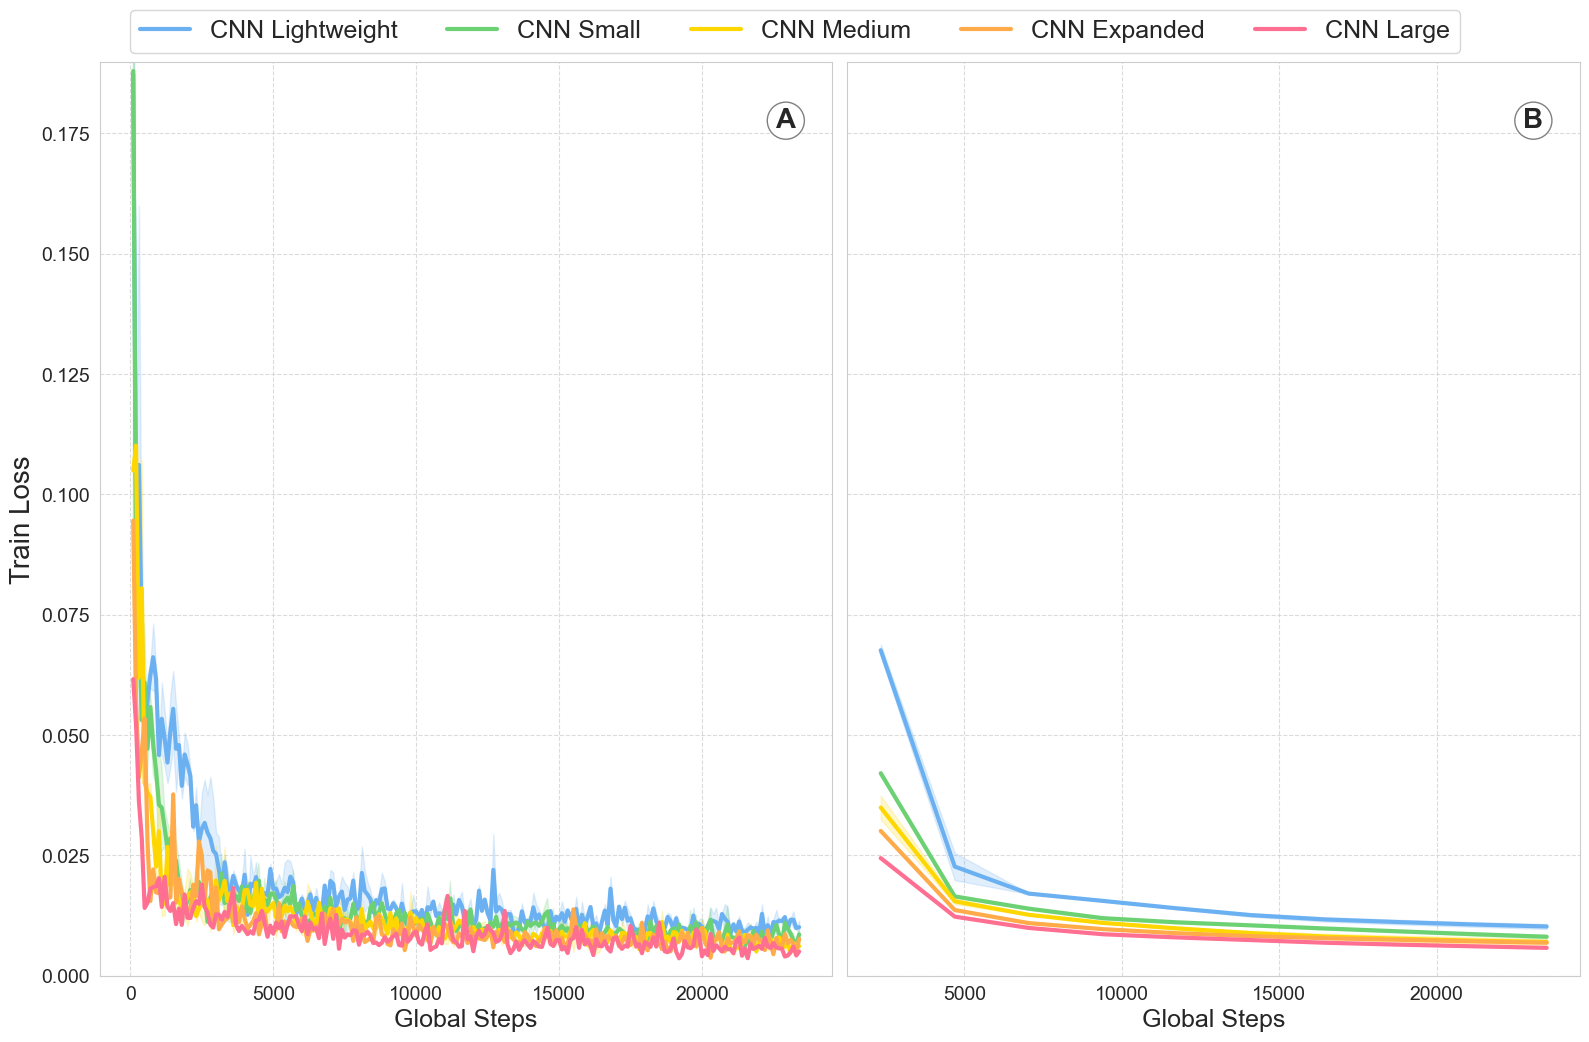

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the train loss data
train_data_steps = pd.read_csv("D:/GitHub/Tareas/Deep/muinar06_act1_individual/data/train_stepx4.csv")  # Data for steps
train_data_epochs = pd.read_csv("D:/GitHub/Tareas/Deep/muinar06_act1_individual/data/train_epochx4.csv")  # Data for epochs

# Plot settings
sns.set_style("whitegrid")
sns.set_palette("muted")

model_names = {
    "cnn__lightweight__l1__True": "CNN Lightweight",
    "cnn__small__l1__True": "CNN Small",
    "cnn__medium__l1__True": "CNN Medium",
    "cnn__expanded__l1__True": "CNN Expanded",
    "cnn__large__l1__True": "CNN Large"
}

# Adjusted colors with the requested swap between medium and large
colors = ['#6BB1F1', '#6BD173', '#FFD700', '#FFAB49', '#FF6F91']  # Blue, green, orange (medium), red (large), yellow

# Set up the figure and subplots with more width
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))  # Increase figure size for better visibility

# Plot A: Train Loss based on Steps (left side)
for model, display_name, color in zip(model_names.keys(), model_names.values(), colors):
    ax1.plot(train_data_steps["trainer/global_step"], train_data_steps[f"{model} - train_loss_step"], color=color, linestyle='-', linewidth=3)
    ax1.fill_between(train_data_steps["trainer/global_step"], 
                     train_data_steps[f"{model} - train_loss_step__MIN"], 
                     train_data_steps[f"{model} - train_loss_step__MAX"], 
                     color=color, alpha=0.2)
    
# Customize Plot A
ax1.set_xlabel('Global Steps', fontsize=18)
ax1.set_ylabel('Train Loss', fontsize=20)
ax1.text(0.95, 0.95, 'A', transform=ax1.transAxes, ha='right', va='top', fontsize=20, fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='circle,pad=0.2'))  # Add circular white background
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='both', labelsize=14)

# Plot B: Train Loss based on Epochs (right side)
for model, display_name, color in zip(model_names.keys(), model_names.values(), colors):
    ax2.plot(train_data_epochs["trainer/global_step"], train_data_epochs[f"{model} - train_loss_epoch"], color=color, linestyle='-', linewidth=3)
    ax2.fill_between(train_data_epochs["trainer/global_step"], 
                     train_data_epochs[f"{model} - train_loss_epoch__MIN"], 
                     train_data_epochs[f"{model} - train_loss_epoch__MAX"], 
                     color=color, alpha=0.2)

# Customize Plot B
ax2.set_xlabel('Global Steps', fontsize=18)
ax2.text(0.95, 0.95, 'B', transform=ax2.transAxes, ha='right', va='top', fontsize=20, fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='circle,pad=0.2'))  # Add circular white background
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='both', labelsize=14)
ax2.set_yticklabels([])  # Remove y-axis labels on the second plot
ax2.set_ylabel('')       # Remove y-axis title on the second plot

# Set the same y-axis limits for both plots
y_max = max(train_data_steps[[f"{model} - train_loss_step" for model in model_names.keys()]].max().max(),
            train_data_epochs[[f"{model} - train_loss_epoch" for model in model_names.keys()]].max().max()) * 1.01
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

# Single, centered legend with unique labels and symbols
legend_lines = [plt.Line2D([0], [0], color=color, lw=3) for color in colors]  # Line width matches plot
legend_labels = list(model_names.values())
fig.legend(legend_lines, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), fontsize=18, ncol=5, frameon=True)

# Adjust spacing between subplots and overall layout
plt.subplots_adjust(top=0.85)  # Increase the space for the legend
plt.tight_layout()

# Save the figure as a high-resolution PNG
plt.savefig('images/loss_train_fusionx4.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos
sr = pd.read_csv("D:/GitHub/Tareas/Deep/muinar06_act1_individual/data/toplot2.csv")

# Configuración de estilo y colores
sns.set_style("whitegrid")

model_names_cnn = {
    "cnn__lightweight": "Lightweight",
    "cnn__small": "Small",
    "cnn__medium": "Medium",
    "cnn__expanded": "Expanded"
}

model_names_swin = {
    "swin__lightweight": "Lightweight",
    "swin__small": "Small",
    "swin__medium": "Medium",
    "swin__expanded": "Expanded"
}

model_names_mamba = {
    "mamba__lightweight": "Lightweight",
    "mamba__small": "Small",
    "mamba__medium": "Medium",
    "mamba__expanded": "Expanded"
}

colors = ['#6BB1F1', '#6BD173', '#FFD700', '#FFAB49']

# Obtener el último valor de pérdida de prueba para cada modelo
cnn_loss = [sr[f"{model} - test_loss_epoch"].iloc[-1] for model in model_names_cnn.keys()]
swin_loss = [sr[f"{model} - test_loss_epoch"].iloc[-1] for model in model_names_swin.keys()]
mamba_loss = [sr[f"{model} - test_loss_epoch"].iloc[-1] for model in model_names_mamba.keys()]

# Configuración de figura y subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

# Gráfico A: CNN
ax1.bar(model_names_cnn.values(), cnn_loss, color=colors[:len(cnn_loss)], edgecolor='black')
ax1.set_ylabel('Test Loss', fontsize=16)
ax1.set_xticklabels(model_names_cnn.values(), fontsize=14, rotation=45)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_title('CNN Models', fontsize=20, fontweight='bold', loc='center')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_ylim(0, max(cnn_loss) * 1.1)

# Gráfico B: Swin
ax2.bar(model_names_swin.values(), swin_loss, color=colors[:len(swin_loss)], edgecolor='black')
ax2.set_ylabel('Test Loss', fontsize=16)
ax2.set_xticklabels(model_names_swin.values(), fontsize=14, rotation=45)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_title('Swin Models', fontsize=20, fontweight='bold', loc='center')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_ylim(0, max(swin_loss) * 1.1)

# Gráfico C: Mamba
ax3.bar(model_names_mamba.values(), mamba_loss, color=colors[:len(mamba_loss)], edgecolor='black')
ax3.set_ylabel('Test Loss', fontsize=16)
ax3.set_xticklabels(model_names_mamba.values(), fontsize=14, rotation=45)
ax3.tick_params(axis='y', labelsize=14)
ax3.set_title('Mamba Models', fontsize=20, fontweight='bold', loc='center')
ax3.grid(True, linestyle='--', alpha=0.7)
ax3.set_ylim(0, max(mamba_loss) * 1.1)

# Ajustes finales y guardado
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('images/fusionx2x4_loss_test.png', dpi=300, bbox_inches='tight')
plt.show()


KeyError: 'cnn__lightweight - test_loss_epoch'

C:\Users\contr\AppData\Local\Temp\ipykernel_23824\3721861241.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(model_names_cnn.values(), fontsize=14)
C:\Users\contr\AppData\Local\Temp\ipykernel_23824\3721861241.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(model_names_swin.values(), fontsize=14)
C:\Users\contr\AppData\Local\Temp\ipykernel_23824\3721861241.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(model_names_mamba.values(), fontsize=14)


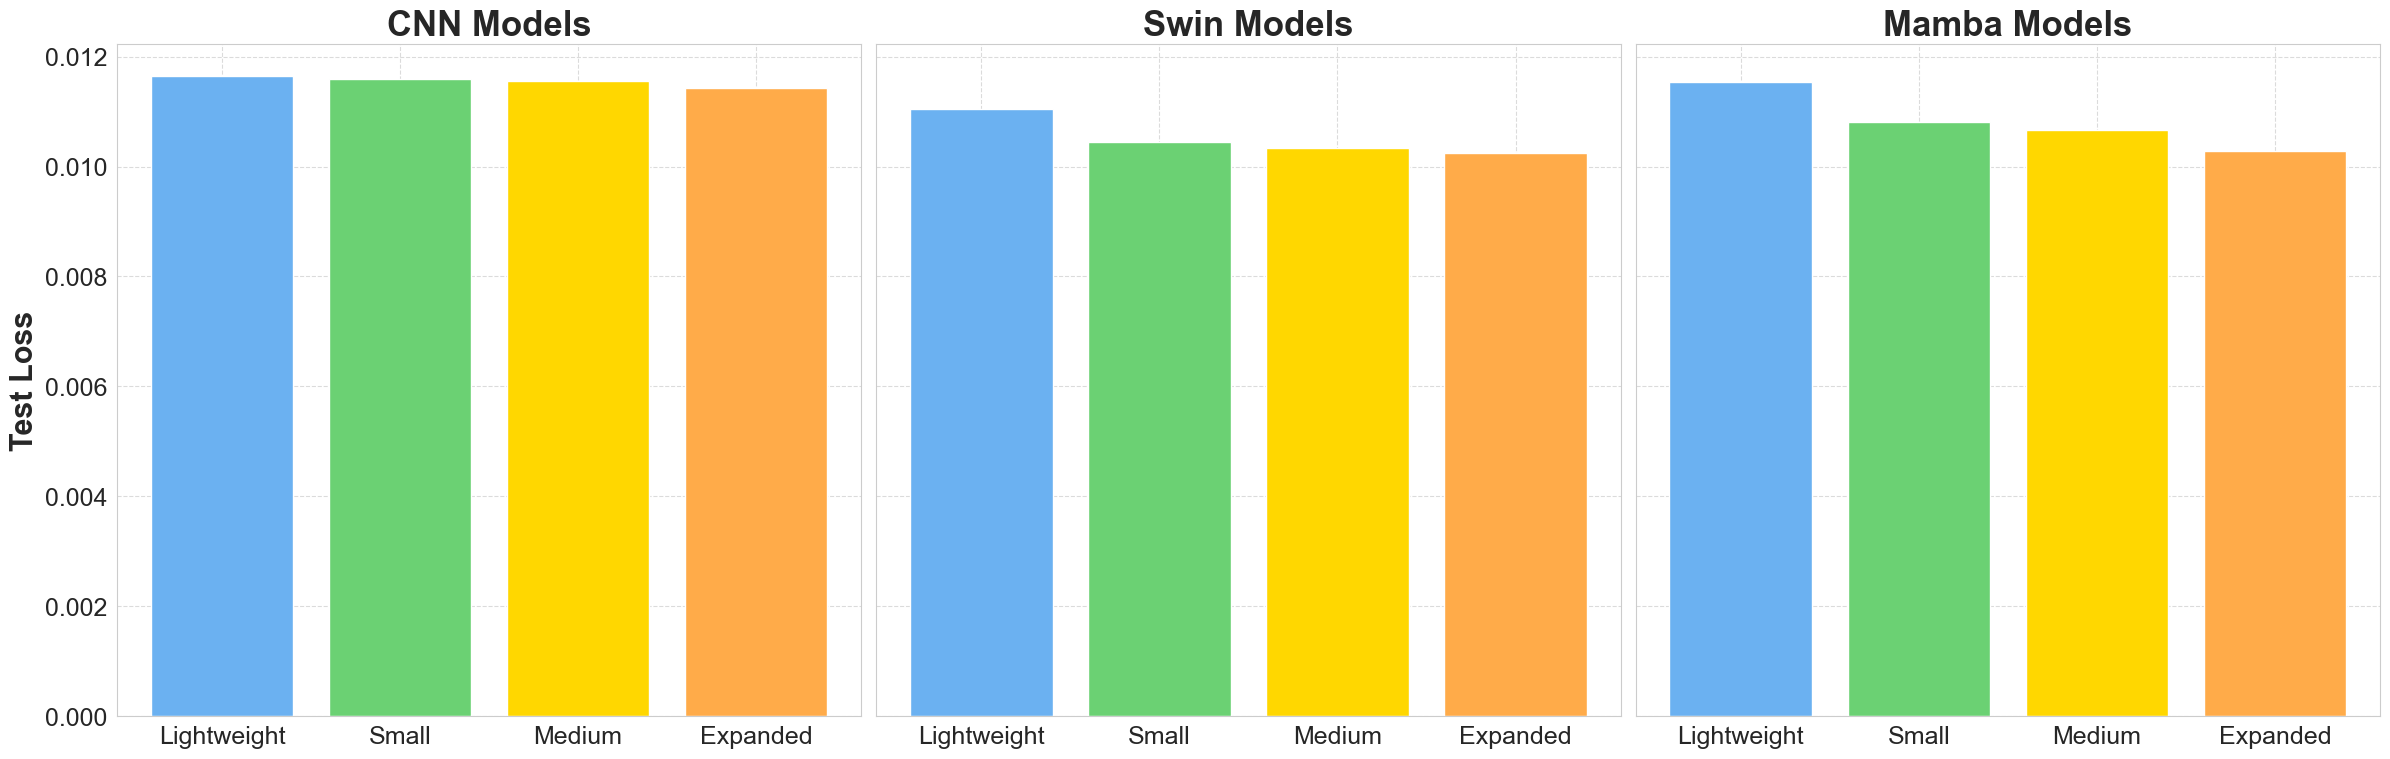

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos
sr = pd.read_csv("D:/GitHub/Tareas/Deep/muinar06_act1_individual/data/toplot2.csv")

# Configuración de estilo y colores
sns.set_style("whitegrid")

model_names_cnn = {
    "cnn__lightweight": "Lightweight",
    "cnn__small": "Small",
    "cnn__medium": "Medium",
    "cnn__expanded": "Expanded"
}

model_names_swin = {
    "swin__lightweight": "Lightweight",
    "swin__small": "Small",
    "swin__medium": "Medium",
    "swin__expanded": "Expanded"
}

model_names_mamba = {
    "mamba__lightweight": "Lightweight",
    "mamba__small": "Small",
    "mamba__medium": "Medium",
    "mamba__expanded": "Expanded"
}

colors = ['#6BB1F1', '#6BD173', '#FFD700', '#FFAB49']

# model_names_cnn.keys()

# for model in model_names_cnn.keys():
#     print(sr[model].iloc[-1])
# Obtener el último valor de pérdida de prueba para cada modelo
cnn_loss = [sr[model].iloc[-1] for model in model_names_cnn.keys()]
swin_loss = [sr[model].iloc[-1] for model in model_names_swin.keys()]
mamba_loss = [sr[model].iloc[-1] for model in model_names_mamba.keys()]

# Calcular el máximo global de las pérdidas
max_loss = max(max(cnn_loss), max(swin_loss), max(mamba_loss))

# Configuración de figura y subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

# Gráfico A: CNN
ax1.bar(model_names_cnn.values(), cnn_loss, color=colors[:len(cnn_loss)])
ax1.set_ylabel('Test Loss', fontsize=22, fontweight='bold')
ax1.set_xticklabels(model_names_cnn.values(), fontsize=14)
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.set_title('CNN Models', fontsize=25, fontweight='bold', loc='center')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_ylim(0, max_loss * 1.05)  # Usar el mismo límite superior

# Gráfico B: Swin
ax2.bar(model_names_swin.values(), swin_loss, color=colors[:len(swin_loss)])
ax2.set_xticklabels(model_names_swin.values(), fontsize=14)
ax2.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(labelleft=False)  # Quitar solo las etiquetas del eje Y
ax2.set_title('Swin Models', fontsize=25, fontweight='bold', loc='center')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_ylim(0, max_loss * 1.05)  # Usar el mismo límite superior

# Gráfico C: Mamba
ax3.bar(model_names_mamba.values(), mamba_loss, color=colors[:len(mamba_loss)])
ax3.set_xticklabels(model_names_mamba.values(), fontsize=14)
ax3.tick_params(axis='y', labelsize=18)
ax3.tick_params(axis='x', labelsize=18)
ax3.tick_params(labelleft=False)  # Quitar solo las etiquetas del eje Y
ax3.set_title('Mamba Models', fontsize=25, fontweight='bold', loc='center')
ax3.grid(True, linestyle='--', alpha=0.7)
ax3.set_ylim(0, max_loss * 1.05)  # Usar el mismo límite superior

# Ajustes finales y guardado
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('images/sr_models.png', dpi=400, bbox_inches='tight')
plt.show()
